# Investigating the Chemical Properties of Drinking Water: A Statistical Analysis of pH and Conductivity in Potable and Non-Potable Water Sources
### Group 34: Roberto Mulliadi, Brian Suharianto, Yuxin Chen, Angelina Hsu

## Introduction
Access to potable water is critical for various human activities, including domestic use, agricultural productivity, and energy production. It also has benefits that extend to industrial development and poverty reduction, which ultimately leads to desired economic prosperity.

Our project aims to analyze how the pH levels and conductivity of water affect its potability. To do this, we will carry out hypothesis testing and construct confidence intervals based on the Water Potability Dataset from __[Kaggle](https://www.kaggle.com/datasets/adityakadiwal/water-potability)__, which includes data collected from 3276 distinct water bodies across the world. 

The point estimate will be the difference in means for both pH and conductivity, and the sample standard deviation will be the measure of variability due to the unknown population distribution. The population of interest is all potentially potable water bodies worldwide, including lakes, rivers, streams, reservoirs, and groundwater sources.

##### Definitions
Conductivity: Ability to conduct electricity, measured by the amount of dissolved ions and salts in the water.
<br>
pH: The measure of water's acidity or basicity, measured by the concentration of hydrogen ions present in the water.

## Research Question
How do pH levels and conductivity affect the potability of all potential sources of drinking water worldwide?

Hypotheses for pH levels ($\mu_1$ is the mean pH level of potable water and $\mu_2$ is the mean pH level of non-potable water)

$H_0: \mu_1 - \mu_2 = 0$ 

$H_A: \mu_1 - \mu_2 \neq 0$

Hypotheses for Conductivity ($\mu_1$ is the mean Conductivity of potable water and $\mu_2$ is the mean Conductivity of non-potable water in MicroSiemens/cm)

$H_0: \mu_1 - \mu_2 = 0$ 

$H_A: \mu_1 - \mu_2 \neq 0$

## Preliminary Data Analysis
Load the dataset, standardize all columns except Potability, and check the linear correlation between the 9 variables. The correlation matrix shows no significant linear correlations.

In [2]:
# The following libraries are required to run and visualize the dataset
library(tidyverse, quietly = TRUE)
library(dplyr, quietly = TRUE)
library(infer, quietly = TRUE)
library(ggplot2, quietly = TRUE)
library(tidyr, quietly = TRUE)
install.packages("cowplot", quietly = TRUE)
library(cowplot, quietly = TRUE)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.0 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [4]:
water_data <- read_csv("water_potability.csv")
head(water_data, 6)

Rows: 3276 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.379783,86.99097,2.963135,0
3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.180013,56.32908,4.500656,0
8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.868637,66.42009,3.055934,0
8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.436524,100.34167,4.628771,0
9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.558279,31.99799,4.075075,0
5.584087,188.3133,28748.69,7.544869,326.6784,280.4679,8.399735,54.91786,2.559708,0


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,0.2591551,-0.1394495830,0.1123977,0.8388053,1.70869338,-1.1804704,1.273240605,-1.2861012,0
2,-2.1104392,-2.0361028,-0.3859277338,-0.3076467,NA,2.06226017,0.2705559,-0.622393287,0.6841135,0
3,0.6387237,0.8475354,-0.2400106967,1.3603862,NA,-0.09401776,0.7809976,0.001471379,-1.1671873,0
4,0.7752344,0.5475678,0.0004932291,0.5919175,0.5579943,-0.77871108,1.2549429,2.098631452,0.8482820,0
5,1.2616222,-0.4643582,-0.4601783194,-0.3636424,-0.5707833,-0.34388641,-0.8242313,-2.126632600,0.1387643,0
6,-0.9387754,-0.2450192,0.7680379557,0.2669421,-0.1713654,-1.80314114,-1.7790047,-0.709639884,-1.8030621,0


NULL

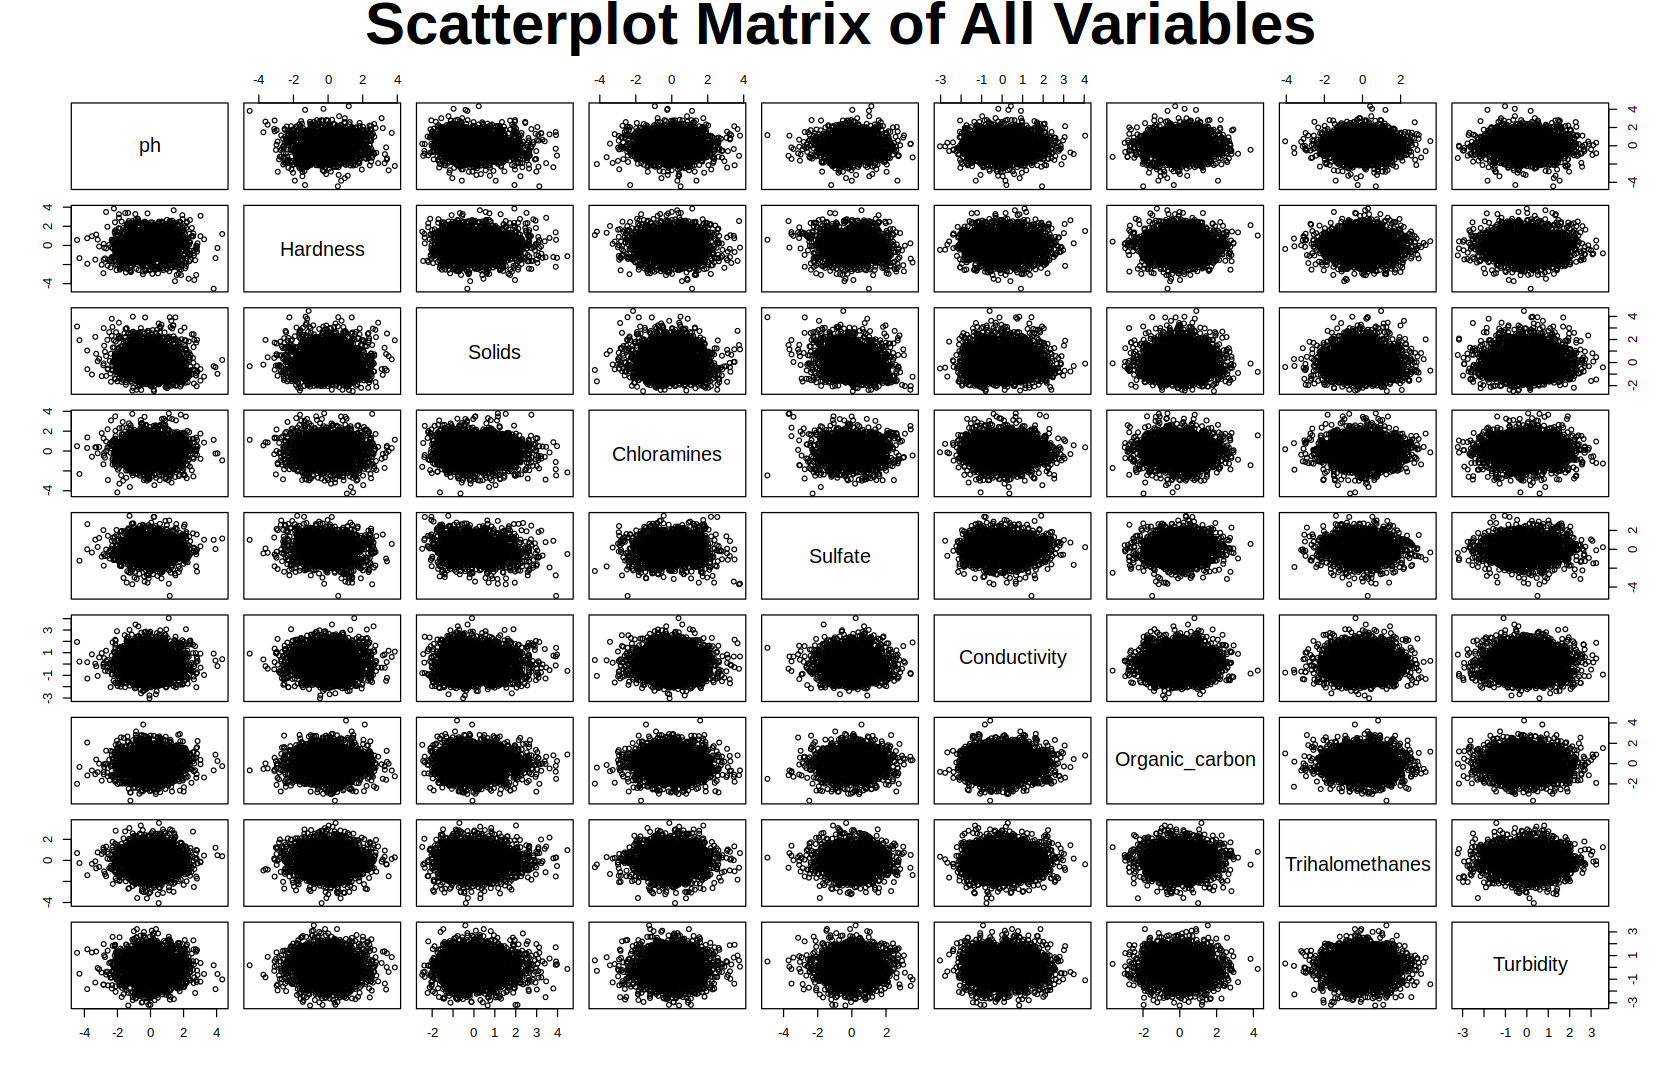

In [6]:
# Resizing the width and height of plots for better/clearer visualization
options(repr.plot.width = 14, repr.plot.height = 9)

# Standardizing all columns except for Potability
water_data_standardized <- scale(water_data[1:9], center = TRUE) |>
    cbind(water_data[10])
head(water_data_standardized, 6)

# Creating a scatterplot matrix of all variables in the dataset
water_scatterplot_matrix <- water_data_standardized[,1:9] |>
    pairs(labels = colnames(water_data_standardized[,1:9]),
          main = "Scatterplot Matrix of All Variables",
          cex = 0.8,
          cex.labels = 1.5,
          cex.main = 3) +
    geom_point(alpha = 0.1)
water_scatterplot_matrix

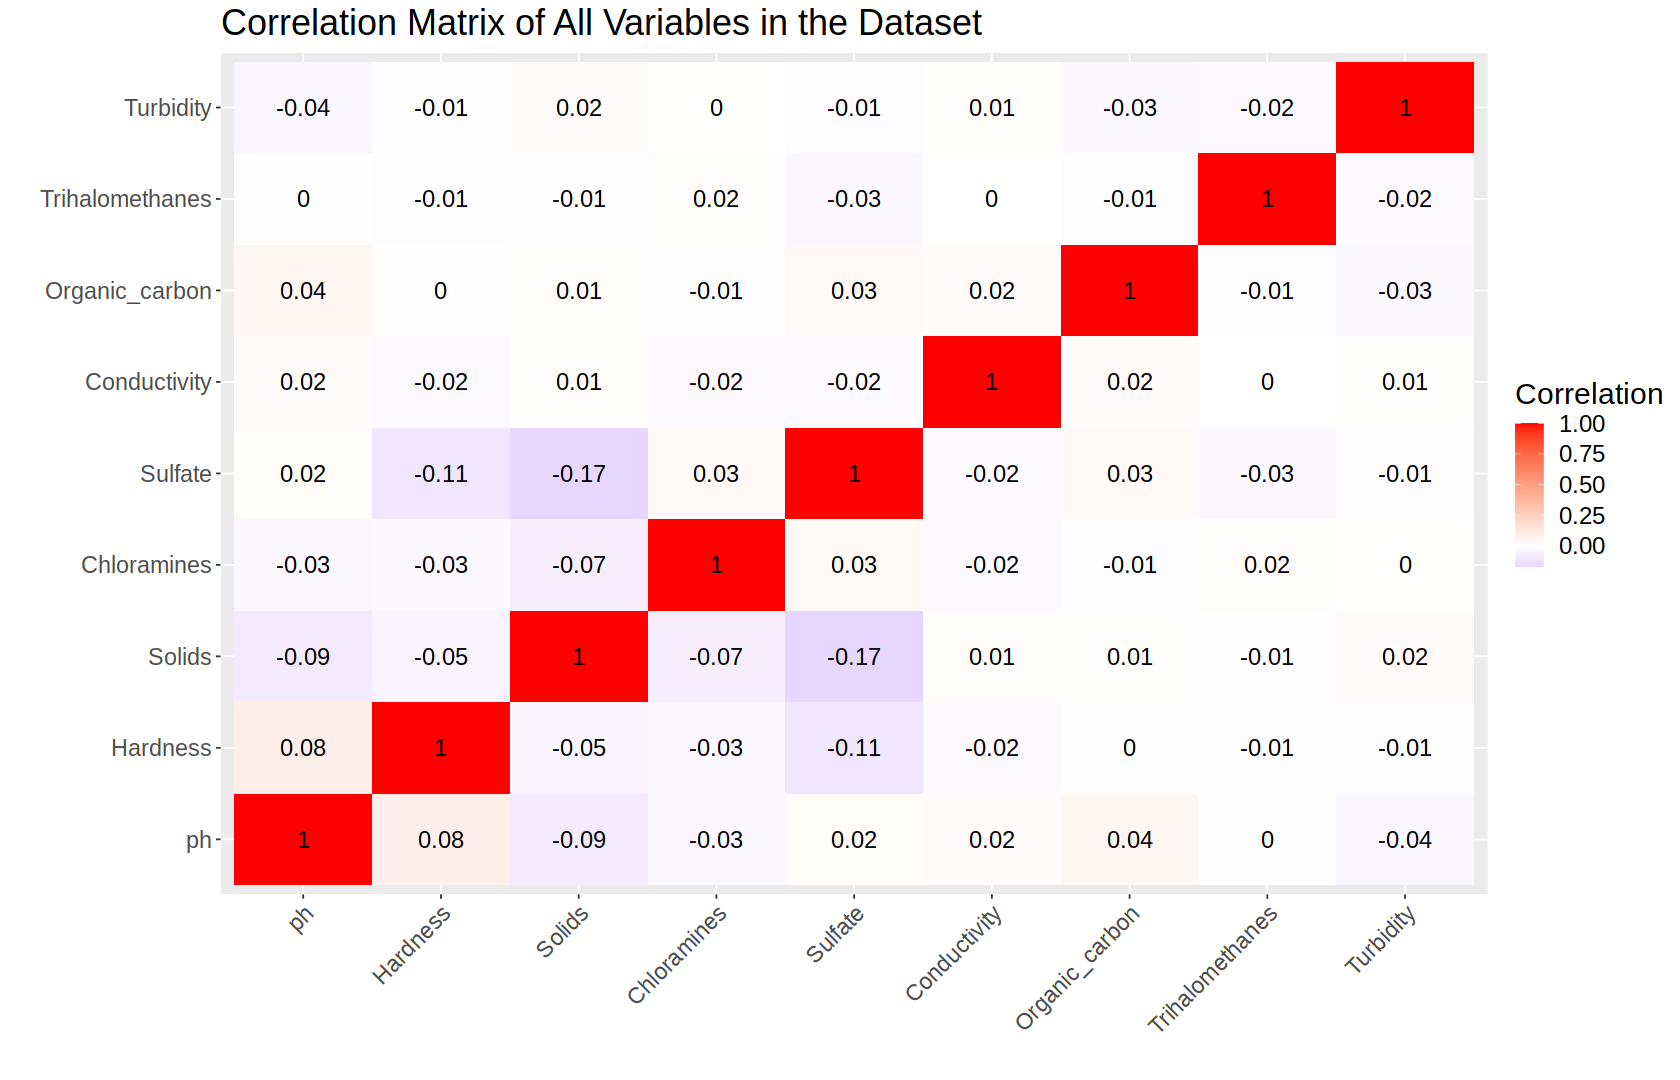

In [8]:
# Create a dataframe with the first and other 8 columns (excluding the 10th)
water_data_corr <- water_data_standardized[, 1:9]

# Compute the correlation matrix while removing any missing values
cor_matrix <- cor(water_data_corr, use = "pairwise.complete.obs")

# Convert the correlation matrix to a long format
cor_matrix_long <- reshape2::melt(cor_matrix)

# Create a correlation matrix plot using ggplot2
ggplot(cor_matrix_long, aes(x = Var1, y = Var2, fill = value)) +
    geom_tile() +
    scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
    geom_text(aes(label = round(value, 2)), size = 5) +
    theme(text = element_text(size = 18)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 14)) +
    theme(axis.text.y = element_text(size = 14)) +
    
    ggtitle("Correlation Matrix of All Variables in the Dataset") +
    labs(x = "", y = "", fill = "Correlation")

Split the dataset into two categories based on Potability values: 1 indicates drinkable water, and 0 indicates non-drinkable. Then, select only pH and Conductivity variables while removing missing values.

In [12]:
# Splitting the dataset into potable and non-potable water
# Potable water data
water_data_potable <- water_data |>
    filter(Potability == 1, !is.na(ph), !is.na(Conductivity)) |>
    select(ph, Conductivity, Potability)
head(water_data_potable, 5)
nrow(water_data_potable)

# Non potable water data
water_data_non_potable <- water_data |>
    filter(Potability == 0, !is.na(ph), !is.na(Conductivity)) |>
        select(ph, Conductivity, Potability)
head(water_data_non_potable, 5)
nrow(water_data_non_potable)


ph,Conductivity,Potability
<dbl>,<dbl>,<dbl>
9.445130,592.6590,1
9.024845,451.1435,1
6.800119,376.4566,1
7.174135,315.5499,1
7.657991,416.6242,1


[1] 1101

ph,Conductivity,Potability
<dbl>,<dbl>,<dbl>
3.716080,592.8854,0
8.099124,418.6062,0
8.316766,363.2665,0
9.092223,398.4108,0
5.584087,280.4679,0


[1] 1684

Plot the distributions of both variables in each sample. Note that pH and conductivity are approximately normal in both categories, with values symmetrically distributed around the mean and following a bell-shaped curve.

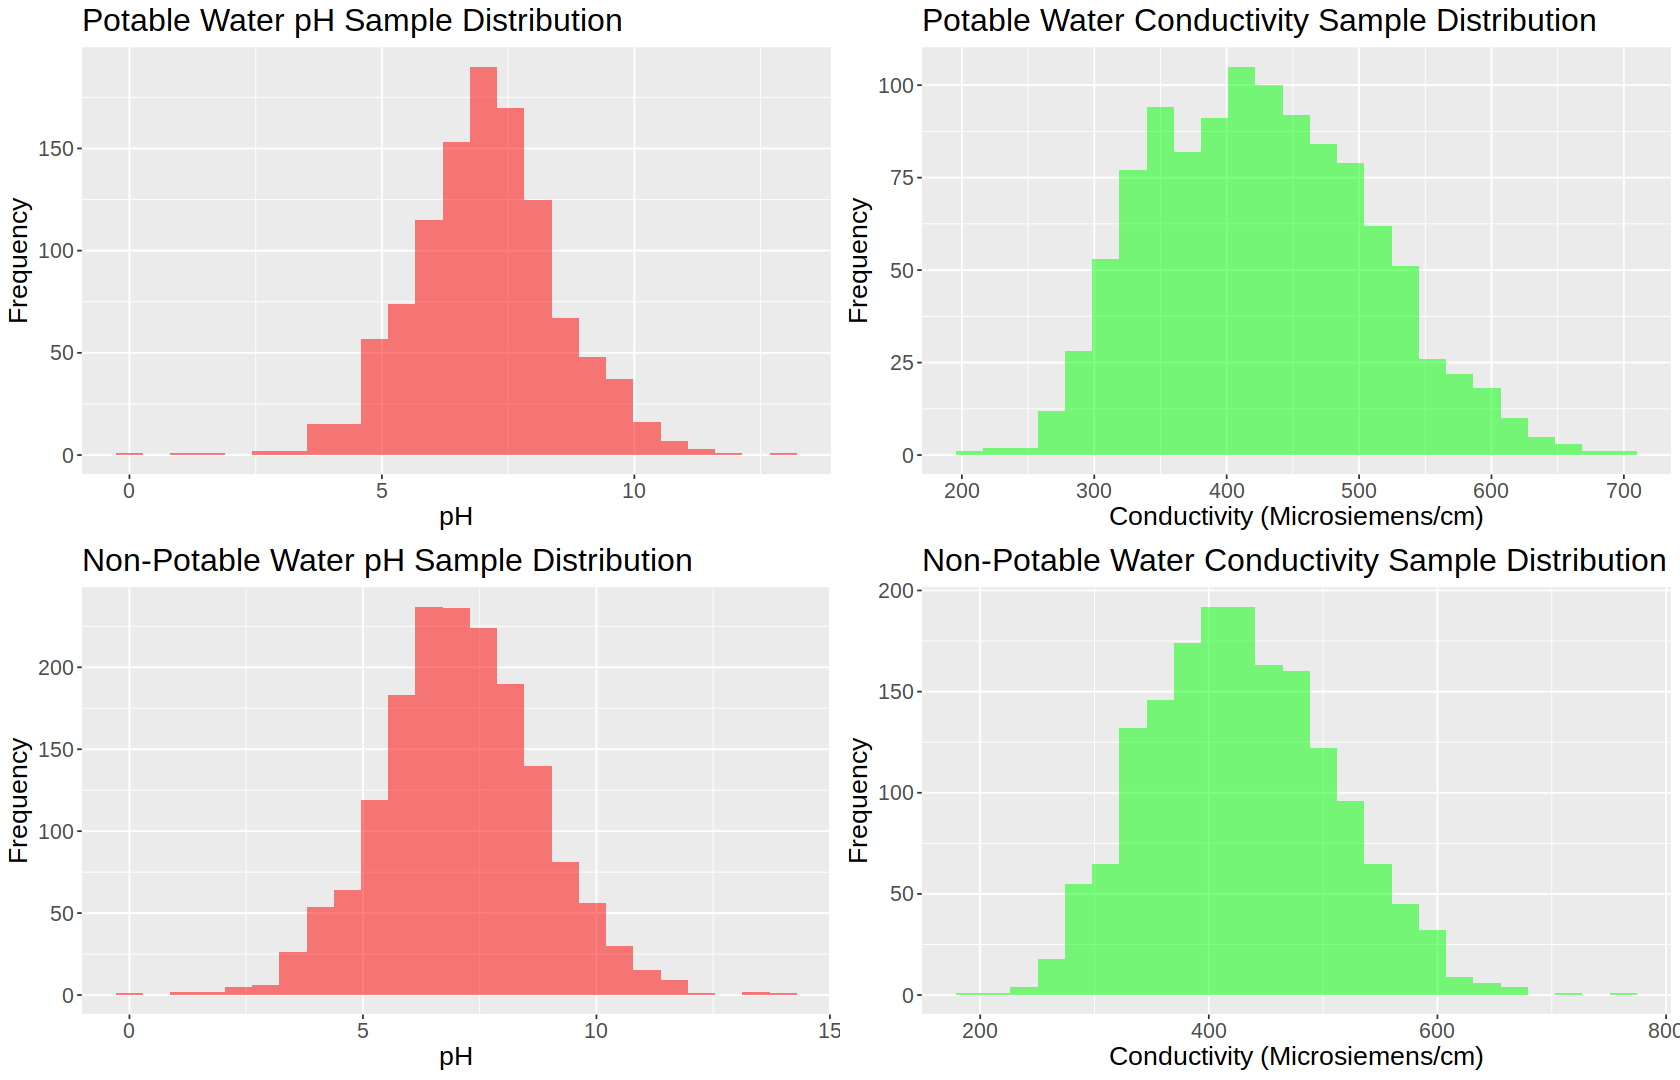

In [24]:
# Plotting the distribution of ph and Conductivity for potable water
# Create histogram for pH of potable water
potable_water_ph <- ggplot(water_data_potable, aes(x = ph)) +
    geom_histogram(alpha = 0.5, bins = 25, fill = "red") +
    labs(title = "Potable Water pH Sample Distribution",
         x = "pH",
         y = "Frequency") +
    theme(text = element_text(size = 16))

# Create histogram for Conductivity of potable water
potable_water_conductivity <- ggplot(water_data_potable, aes(x = Conductivity)) +
    geom_histogram(alpha = 0.5, bins = 25, fill = "green") +
    labs(title = "Potable Water Conductivity Sample Distribution",
         x = "Conductivity (Microsiemens/cm)",
         y = "Frequency") +
    theme(text = element_text(size = 16))

# Plotting the distribution of ph and Conductivity for non-potable water
# Create histogram for pH of non-potable water
non_potable_water_ph <- ggplot(water_data_non_potable, aes(x = ph)) +
    geom_histogram(alpha = 0.5, bins = 25, fill = "red") +
    labs(title = "Non-Potable Water pH Sample Distribution",
         x = "pH",
         y = "Frequency") +
    theme(text = element_text(size = 16))

# Create histogram for Conductivity of non-potable water
non_potable_water_conductivity <- ggplot(water_data_non_potable, aes(x = Conductivity)) +
    geom_histogram(alpha = 0.5, bins = 25, fill = "green") +
    labs(title = "Non-Potable Water Conductivity Sample Distribution",
         x = "Conductivity (Microsiemens/cm)",
         y = "Frequency") +
    theme(text = element_text(size = 16))

# Combine all histograms into a single plot
combined_plot <- plot_grid(potable_water_ph, potable_water_conductivity,
                              non_potable_water_ph, non_potable_water_conductivity,
                              ncol = 2)
combined_plot
    

Then calculate the point estimates so that we have an estimate of the unknown population parameter.

In [25]:
# Calculating the mean pH and conductivity of potable water
potable_means <- water_data_potable |>
    summarize(mean_ph = mean(ph),
              mean_conductivity = mean(Conductivity))
potable_means

# Calculating the mean pH and conductivity of non-potable water
non_potable_means <- water_data_non_potable |>
    summarize(mean_ph = mean(ph),
              mean_conductivity = mean(Conductivity))
non_potable_means

mean_ph,mean_conductivity
<dbl>,<dbl>
7.073783,426.5484


mean_ph,mean_conductivity
<dbl>,<dbl>
7.085378,427.4242


In [27]:
# Calculating the difference in means of pH and conductivity of potable vs non-potable water
point_estimate_ph <- potable_means$mean_ph - non_potable_means$mean_ph
point_estimate_conductivity <- potable_means$mean_conductivity - non_potable_means$mean_conductivity

# Creating a table to present the point estimates
point_estimates <- data.frame(
    diff_in_means_ph = c(point_estimate_ph),
    diff_in_means_conductivity = c(point_estimate_conductivity)
)
point_estimates

diff_in_means_ph,diff_in_means_conductivity
<dbl>,<dbl>
-0.01159514,-0.875791


## Methods: Plan
### Why our report is reliable
We ensured report reliability with random sampling, a large sample size, and consistent methods and outcomes with prior research. Robustness checks addressed potential concerns, and all results were transparently reported with the use of valid measures. All conditions were met to conduct two-sample t-tests and construct confidence intervals.
<br>
Plots and estimates offer valuable insights to stakeholders, but other factors may randomly influence the results. Additional information from existing literature and human factors may be necessary to make informed decisions about the complexity/uncertainty of the data.

### Methodology:

1. Load libraries and data
2. Visualize and analyze correlations between variables
3. Split data into potable and non-potable water samples (Independent)
4. Analyze sample distributions
5. Conduct two-sample t-test on pH and conductivity
6. Calculate 95% confidence intervals via bootstrapping, asymptotics and/or theory-based methods
7. Interpret results by rejecting or not rejecting the null hypotheses

### Expected Outcomes and Significance
We anticipate significant differences in mean pH values between potable and non-potable water, but no significant difference in mean conductivity (measured in Microsiemens/cm).

#### Project Impact
The analysis may have significant implications for water treatment, public health policies, and international standards for safe drinking water. For instance, if high conductivity levels reduce potability, treatment plants could adapt their methods to mitigate the issue.

#### Future Questions
- What specific treatment methods can be used to effectively address the effects of pH and conductivity on water potability?
- What are the long-term health effects of consuming water with varying pH and conductivity levels?
- How do other factors affect water potability?











## References